# CS-433 Machine learning project 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import helpers
from implementations import *

%load_ext autoreload
%autoreload 2

In [2]:
# x_train = np.genfromtxt("data/dataset/x_train.csv", delimiter=',', skip_header=1)
# y_train = np.genfromtxt("data/dataset/y_train.csv", delimiter=',', skip_header=1)
# x_test =  np.genfromtxt("data/dataset/x_test.csv", delimiter=',', skip_header=1)
x_train, x_test, y_train, train_ids, test_ids = helpers.load_csv_data("data/dataset")

In [3]:
print(x_train[:,5])
print(x_train[0,5].dtype)
print(np.isnan(x_train[0,5]))
print(np.sum(np.isnan(x_train[:,10])))
print(y_train)

[2015. 2015. 2015. ... 2015. 2015. 2015.]
float64
False
139415
[-1 -1 -1 ... -1 -1 -1]


## Nan handling

In [4]:

#calculate number number of nan per column
logical_matrix = np.isnan(x_train)
nan_per_columns = np.sum(logical_matrix, axis=0)
print(nan_per_columns)
average_nan = np.mean(nan_per_columns)
print(average_nan)
print(np.shape(nan_per_columns))
print(np.shape(x_train)[1])

[     0      0      0      0      0      0      0      0      0 139415
 139415 328103 139416 139415 328103 139433 139524 139525 188720 188720
 188721 188720 327334 188719 189287 192544      2      1      0 159860
      0      0      1      1      1 196334      0  43801  43801      0
      0 284153      1      0      0      1      0      0      5 285915
      0      0      0      0 139415 318245 139415      1      0      3
   2471   3207   3946   4407 279663   6933   7743   8293   8728   9149
   9432   9862  10541 191379 282510 237369  11007  11765 170906 171212
 171522  20738  21567  22468  23149  23759  24502  26205 107829 109141
 109407 109690 181261 181400  28647 226907 227043 227197 229088  29911
  30600 186763 186001  31022  32080 243418 243561 266689 266689 306425
 306426 306428 306429 306429 306629 306429 306430 306430 247299 310302
 310320 310346 310367 310392 310403 310450 265347 325762 325769 325769
 327339 326264 325775 325777 325777 325780 241493 318477 318489 325051
 31850

In [5]:
# delet the columns with more nan than the average
x_train_reduced_features = x_train[:, nan_per_columns <= average_nan]




In [6]:
print(np.shape(x_train))

(328135, 321)


In [7]:
#replace nan values with the mean:
x_train_w_mean = x_train
for i in range( np.shape(x_train)[1]):
    nan_entries = np.isnan(x_train[:,i])
    mean = np.mean(x_train[~nan_entries,i])

    nan_entries = np.isnan(x_train[:,i])

    x_train_w_mean[nan_entries, i] = mean
    
logical_matrix = np.isnan(x_train_w_mean)
nan_per_columns2 = np.sum(logical_matrix, axis=0)
print(nan_per_columns2)





[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
x_train_std, _, _, = standardize(x_train_w_mean)
print(x_train_std)

[[ 1.43629640e+00  1.33036073e+00  1.31787257e+00 ... -4.98941290e-12
   2.63592491e-12  2.44635873e-02]
 [ 1.88772178e-01  1.61711904e+00  1.60160179e+00 ... -4.98941290e-12
   2.63592491e-12 -2.90142707e-13]
 [-6.22118565e-01  1.04360241e+00  1.04274121e+00 ... -8.59212775e-01
  -2.46031587e-01  2.44635873e-02]
 ...
 [ 5.63029444e-01  1.04360241e+00  1.04274121e+00 ... -1.93109791e-01
  -2.46031587e-01  2.44635873e-02]
 [ 1.88772178e-01  1.61711904e+00  1.64459107e+00 ... -4.98941290e-12
   2.63592491e-12  2.44635873e-02]
 [ 1.26395967e-01  7.56844099e-01  7.33218431e-01 ... -4.98941290e-12
   2.63592491e-12  2.44635873e-02]]


In [9]:


print(np.shape(x_train_std))



(328135, 321)


In [10]:
### Count the amount of incidents

minus_ones = np.sum((y_train == -1))

ones = np.sum(( y_train == 1))
print(f"There are {100*minus_ones/len(y_train):.2f} % -1.\n")
print(f"There are {100*ones/len(y_train):.2f} % 1.\n")

There are 91.17 % -1.

There are 8.83 % 1.



## Using a Chi-squared test to determine the important values


In [56]:
# Define a function to calculate the chi-squared values for all features
def chi2_features(X, y):
    chi2_scores = []
    for feature in range(X.shape[1]):
        # Create a contingency table
        contingency_table = np.zeros((2, 2))
        for i in range(2):
            for j in range(2):
                # Count occurrences for each combination of feature and target
                contingency_table[i, j] = np.sum((X[:, feature] == i) & (y == j))
        # Calculate the chi-squared statistic
        chi2 = np.sum((contingency_table - np.mean(contingency_table))**2 / np.mean(contingency_table))
        chi2_scores.append(chi2)
    return chi2_scores

# Calculate chi-squared values for all features
chi2_scores = chi2_features(x_train_std, y_train)

# Specify the number of top features to select (k)
k = 100 

# Get the indices of the top k features with the highest chi-squared scores
selected_feature_indices = np.argsort(chi2_scores)[-k:]

print(selected_feature_indices)

/tmp/ipykernel_31223/3355181861.py:12: RuntimeWarning: invalid value encountered in divide
  chi2 = np.sum((contingency_table - np.mean(contingency_table))**2 / np.mean(contingency_table))


[  3   2   1  36  45  44  43  42  41  40  39  38  37  86  35  34  33  32
  31  30  29  28 135 144 143 142 141 140 139 138 137 136 145 134 133 132
 131 130 129 128 127 126 154 163 162 161   0 159 158 157 156 155 125 153
 152 151 150 149 148 147 146  96 105 104 103 102 101 100  99  98  97 106
  95  94  93  92  91  90  89  88  87 115 124 123 122 121 120 119 118 117
 116 164 114 113 112 111 110 109 108 107]


## Rebalancing the data

In [72]:
# Choose the desired number of instances for each class
desired_majority_class = 0.20  # for -1
desired_minority_class = 1  # for 1

# Find the indices of the majority and minority classes
majority_indices = np.where(y_train == -1)[0]
minority_indices = np.where(y_train == 1)[0]

# Calculate the number of samples to keep for each class
num_samples_majority = int(desired_majority_class * len(majority_indices))
num_samples_minority = int(desired_minority_class * len(minority_indices))

# Randomly select a subset of majority class instances (undersampling)
undersampled_majority_indices = np.random.choice(majority_indices, num_samples_majority, replace=False)

# Randomly select a subset of minority class instances (oversampling)
oversampled_minority_indices = np.random.choice(minority_indices, num_samples_minority, replace=True)

# Combine the undersampled majority class with the oversampled minority class
X_balanced = np.vstack((x_train_std[undersampled_majority_indices], x_train_std[oversampled_minority_indices]))
y_balanced = np.hstack((y_train[undersampled_majority_indices], y_train[oversampled_minority_indices]))

# Calculate the proportion of each class in the rebalanced dataset
proportion_majority_class = np.sum(y_balanced == -1) / len(y_balanced)
proportion_minority_class = np.sum(y_balanced == 1) / len(y_balanced)

print("Proportion of majority class (-1) in rebalanced dataset:", proportion_majority_class)
print("Proportion of minority class (1) in rebalanced dataset:", proportion_minority_class)


Proportion of majority class (-1) in rebalanced dataset: 0.6737306743837761
Proportion of minority class (1) in rebalanced dataset: 0.32626932561622396


## Training the model

In [91]:
#tx = x_train_std[:, selected_feature_indices] # change input data here
#tx = x_train_std[:, 10:321] # change input data here
tx = X_balanced[:, selected_feature_indices] # change input data here

#y = y_train[:] # change target value here
y = y_balanced[:] # change target value here
y = y.reshape(-1, 1)



w_s=[]
losses=[]

# Number of features
num_features = tx.shape[1]

""" # Initialize weights randomly
w = np.random.uniform(-1, 1, (num_features, 1)) """

# Initialize weights using Xavier/Glorot initialization
w = np.random.uniform(-np.sqrt(6.0 / (num_features + 1)), np.sqrt(6.0 / (num_features + 1)), (num_features, 1))

""" # Initialize weights to near zero
w = np.full((num_features ,1), 1e-16)  """

max_iters=10
accs=[]
precs=[]
recs=[]
F1s=[]
batch_size = 1024
lambda_ = 1e-3
gamma = 0.1

for i in range(max_iters):

    #1) mean_squared_error_gd
    #w, loss = mean_squared_error_gd(y, tx, w, max_iters, gamma)

    #2) mean_squared_error_sgd
    #w, loss = mean_squared_error_sgd(y, tx, w, max_iters, gamma,  batch_size, num_batches=1) 

    #3) least_squares
    #w, loss = least_squares(y, tx)  # change input data here, matrix is not invertible[10, 12, 14/15/20/69]

    #4) ridge_regression
    #w, loss = ridge_regression(y, tx, lambda_)

    #5) logistic_regression
    w, loss = logistic_regression_minusone_one(y, tx, w, max_iters, gamma)

    #6) reg_logistic_regression
    #w, loss = reg_logistic_regression(y, tx, w, max_iters, gamma, lambda_) 

    #7) logistic_regression with mini-batch
    #w, loss = logistic_regression_with_mb(y, tx, w, max_iters, gamma, batch_size)
 
    losses.append(loss)

 
    y_pred=tx.dot(w)
    y_pred = compute_sigmoid(y_pred)
    y_pred[y_pred>0] = 1
    y_pred[y_pred<=0] = -1
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for pred in range(len(y_pred)):
        if (y_pred[pred] == 1 and y[pred] == 1):
            TP+=1
        elif (y_pred[pred] == 1 and y[pred] == -1):
            FP+=1
        elif (y_pred[pred] == -1 and y[pred] == 1):
            FN+=1
        else :
            TN+=1
    acc = (TP+TN)/len(y_pred)
    if TP + FP == 0:
        prec = 0  # Avoid division by zero
    else:
        prec = TP / (TP + FP)


    if TP + FN == 0:
        rec = 0  # Avoid division by zero
    else:
        rec = TP / (TP + FN)


    if prec + rec == 0:
        F1score = 0  # Avoid division by zero
    else:
        F1score = 2 * prec * rec / (prec + rec)


    if acc > 0.75 :
        w_s.append(w)

    accs.append(acc)
    precs.append(prec)
    recs.append(recs)
    F1s.append(F1score)
    conf_matrix = np.array([[TP, FP], [FN, TN]])
    print(f"Iteration {i} of {max_iters} finished.")
    print(f"Accuracy : {acc}, Loss : {loss}")
        
w_s = np.asarray(w_s)
print("lambda = ",lambda_,"| Accuracy moyenne :",np.mean(accs),"| Acc>0.75 :",w_s.shape[0])
print(accs)



Iteration 0 of 10 finished.
Accuracy : 0.32626932561622396, Loss : 0.6454220277772601
Iteration 1 of 10 finished.
Accuracy : 0.32626932561622396, Loss : 0.6365862638119492
Iteration 2 of 10 finished.
Accuracy : 0.32626932561622396, Loss : 0.6351698970501092
Iteration 3 of 10 finished.
Accuracy : 0.32626932561622396, Loss : 0.6346749847380192
Iteration 4 of 10 finished.
Accuracy : 0.32626932561622396, Loss : 0.6344386777553946
Iteration 5 of 10 finished.
Accuracy : 0.32626932561622396, Loss : 0.6343095017833182
Iteration 6 of 10 finished.
Accuracy : 0.32626932561622396, Loss : 0.634249385187
Iteration 7 of 10 finished.
Accuracy : 0.32626932561622396, Loss : 0.6342282338331879
Iteration 8 of 10 finished.
Accuracy : 0.32626932561622396, Loss : 0.6342217816367455
Iteration 9 of 10 finished.
Accuracy : 0.32626932561622396, Loss : 0.6342197928125028
lambda =  0.001 | Accuracy moyenne : 0.326269325616224 | Acc>0.75 : 0
[0.32626932561622396, 0.32626932561622396, 0.32626932561622396, 0.32626932

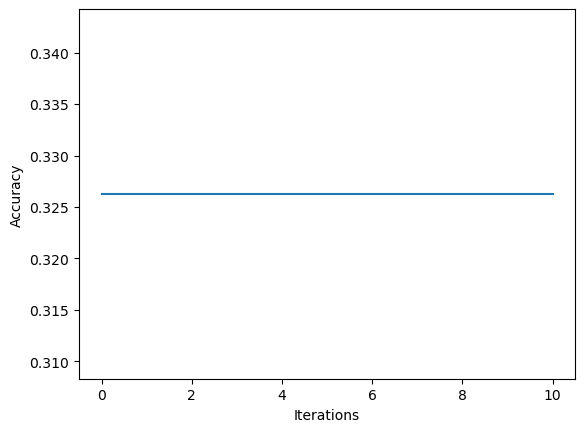

In [92]:
plt.figure()
plt.plot(np.linspace(0, max_iters, max_iters), accs)
#plt.plot(np.linspace(0, max_iters, max_iters), losses)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

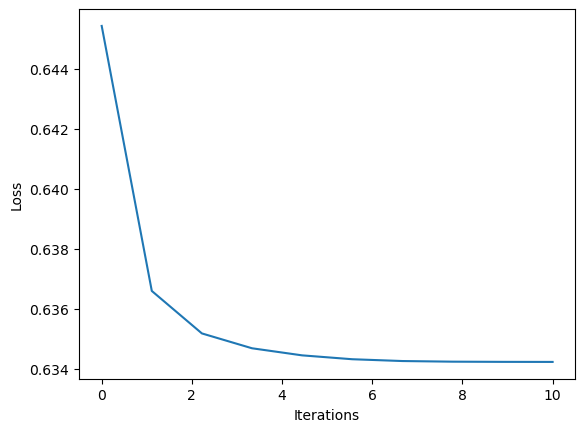

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [93]:
plt.figure()
plt.plot(np.linspace(0, max_iters, max_iters), losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

print(y_pred[:30])


## Create an AI-Crowd submission

In [ ]:
### Generate first submission
x_test = handle_nan_values(x_test, delete_nan_columns=False)
x_test, _, _  = standardize(x_test)
y_test = predict_y(w, x_test[:, 10:321])

helpers.create_csv_submission(test_ids, y_test, "AI_crowd_submission")


In [ ]:
changed_data = False # used to make least_squares work

if changed_data:
    tx = x_train_std[:1000, [10, 42, 69]] # change input data here
    y = y_train[:1000] # change target value here
    y = y.reshape(-1, 1)
else:
    # divide dataset into train and test data in order to test prediction on other data than was used for testing
    train_data_size = 200000
    local_test_data_size = y_train.shape[0] - train_data_size
    total_data_size = y.shape[0]

    tx = x_train_std[:train_data_size, :]
    y = y_train[:train_data_size]
    x_local_test = x_train_std[train_data_size:, :]
    y_local_test = y_train[train_data_size:]

    y = y.reshape(-1, 1)
    y_local_test = y_local_test.reshape(-1, 1)

w_s=[]
losses=[]
w = np.full((tx.shape[1],1), 1e-16) 

max_iters=100
accs=[]
precs=[]
recs=[]
F1s=[]
batch_size = 1 
lambda_ = 1e-3
gamma = 0.1

gammas = np.arange(0.005, 0.3, 0.05)
lambdas = np.arange(0.00005, 0.003, 0.0005)

# Test different gammas and lambdas
#for gamma in gammas:
#    for lambda_ in lambdas:


#1) mean_squared_error_gd
w, loss = mean_squared_error_gd(y, tx, w, max_iters, gamma)
losses.append(loss)
y_local_pred = predict_y(w, x_local_test)
local_test_accuracy = ( total_data_size - np.sum(y_local_test != y_local_pred) ) / total_data_size
print("Local test accuracy of mean_squared_error_gd is", local_test_accuracy)

#2) mean_squared_error_sgd
w, loss = mean_squared_error_sgd(y, tx, w, max_iters, gamma)
losses.append(loss)

#3) least_squares
if changed_data:
    w, loss = least_squares(y, tx)  # change input data here, matrix is not invertible[10, 12, 14/15/20/69]

#4) ridge_regression
w, loss = ridge_regression(y, tx, lambda_)
losses.append(loss)

#5) logistic_regression
w, loss = logistic_regression_minusone_one(y, tx, w, max_iters, gamma)
losses.append(loss)

#6) reg_logistic_regression
w, loss = reg_logistic_regression(y, tx, w, max_iters, gamma, lambda_)
losses.append(loss)


y_pred=tx.dot(w)
y_pred = compute_sigmoid(y_pred)
y_pred[y_pred>0.5] = 1
y_pred[y_pred<=0.5] = 0

TP = 0
FP = 0
TN = 0
FN = 0
for pred in range(len(y_pred)):
    if (y_pred[pred] == 1 and y[pred] == 1):
        TP+=1
    elif (y_pred[pred] == 1 and y[pred] == 0):
        FP+=1
    elif (y_pred[pred] == 0 and y[pred] == 1):
        FN+=1
    else :
        TN+=1
acc = (TP+TN)/len(y_pred)
if TP + FP == 0:
    prec = 0  # Avoid division by zero
else:
    prec = TP / (TP + FP)


if TP + FN == 0:
    rec = 0  # Avoid division by zero
else:
    rec = TP / (TP + FN)


if prec + rec == 0:
    F1score = 0  # Avoid division by zero
else:
    F1score = 2 * prec * rec / (prec + rec)


if acc > 0.75 :
    w_s.append(w)

accs.append(acc)
precs.append(prec)
recs.append(recs)
F1s.append(F1score)
conf_matrix = np.array([[TP, FP], [FN, TN]])
        
w_s = np.asarray(w_s)
print("lambda = ",lambda_,"| Accuracy moyenne :",np.mean(accs),"| Acc>0.75 :",w_s.shape[0])
print(accs)



Local test accuracy of mean_squared_error_gd is -127.135


c:\Users\jonas\EPFL\MA2\ML_Project1\functions.py:22: RuntimeWarning: overflow encountered in exp
  sigmoid = 1/(1+np.exp(-x))
c:\Users\jonas\EPFL\MA2\ML_Project1\functions.py:70: RuntimeWarning: overflow encountered in exp
  loss = np.sum(np.log(1 + np.exp(pred)) - y * pred)


lambda =  0.001 | Accuracy moyenne : 0.9744 | Acc>0.75 : 1
[0.9744]


ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

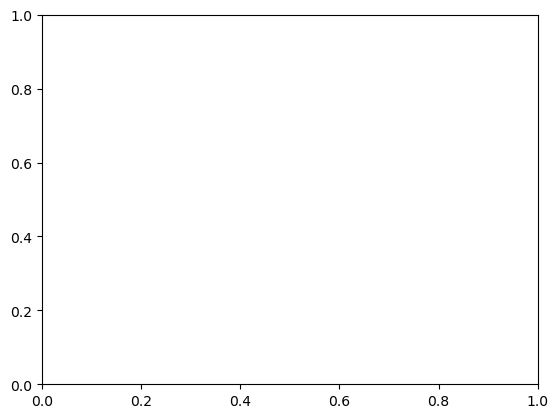

In [ ]:
plt.figure()
plt.plot(np.linspace(0, max_iters, max_iters), accs)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()